In [1]:
# For 2D datasets, the prediction of all possible test data in the x-y plan can be shown as follow.
# The decision boundary is the divide betweem class 0 and class 1.
import mglearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()

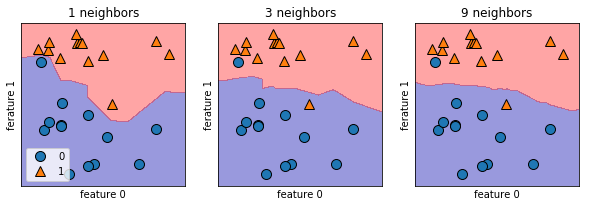

In [2]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbor, ax in zip([1, 3, 9], axes):
    # the fit method return the object itself, so we can instantiate and fit it in one line
    knn = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbor))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('ferature 1')
axes[0].legend(loc=3)

In [3]:
# 1. There are decision boundary of these 3 charts to separate class 0 and class 1.
# 2. With neighbor = 1, the decision boundary is very close to the training data.  => The model is more complex.
# 3. With neighbor = 9, the desicion is smoother.  => The model is simpler.
# 4. Fewer neighbors lead to a complex model.
# 5. More neighbors  lead to a simpler model.

****** The plot shows the training and test set accuracy on the y-axis agains the setting of n_neighbors on the x-axis. ******
With this plot, we can tell the characteristics of overfitting and underfitting.
Training Set:
    With 1 neighbor, the prediction on the training set is perfect.
    But, when more nieghbors are considered, the model became simpler and the training accuracy drops.
Test Set:
    With 1 neighbor, the accuracy is lower than which when considering more neighbors.
    This indicate that considering 1 neighbor leads to a model too complex.
    On the other hand , when considering 10 neighbors, the model is too complex, and the performance is even worse.
    The best performance is somewhere in the middle, using around 6 neighbors.


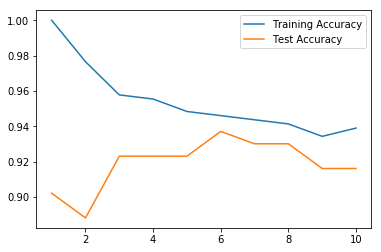

In [7]:
# Followings discuss the relationship between model complexity and generalization.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# create the data object
cancer = load_breast_cancer()

# split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# init the accuracy list of training and test datasets
training_accuracy = []
test_accuracy = []
# try neighbor from 1 to 10
neighbors_setting = range(1, 11)

for n_neighbor in neighbors_setting:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
    # calculate the accuracy of training dataset
    training_accuracy.append(knn.score(X_train, y_train))
    # Calculate the accuracy ot test dataset
    test_accuracy.append(knn.score(X_test, y_test))

# draw the chart of accuracy
plt.plot(neighbors_setting, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_setting, test_accuracy, label='Test Accuracy')
plt.xlabel='n_neighbors'
plt.ylabel='Accuracy'
plt.legend()

print('****** The plot shows the training and test set accuracy on the y-axis agains the setting of n_neighbors on the x-axis. ******')
print('With this plot, we can tell the characteristics of overfitting and underfitting.')
print('Training Set:')
print('    With 1 neighbor, the prediction on the training set is perfect.')
print('    But, when more nieghbors are considered, the model became simpler and the training accuracy drops.')
print('Test Set:')
print('    With 1 neighbor, the accuracy is lower than which when considering more neighbors.')
print('    This indicate that considering 1 neighbor leads to a model too complex.')
print('    On the other hand , when considering 10 neighbors, the model is too complex, and the performance is even worse.')
print('    The best performance is somewhere in the middle, using around 6 neighbors.')